## Importing neccessary library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Importing Data

In [2]:
df = pd.read_csv("ttc-bus-delay-data-2022.csv")

In [3]:
df.shape

(27351, 10)

In [4]:
df.head(10)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
5,1-Jan-22,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,NaN,0
6,1-Jan-22,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0,N,3536
7,1-Jan-22,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,NaN,0
8,1-Jan-22,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,NaN,0
9,1-Jan-22,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0,E,8094


In [5]:
df.isnull().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

In [6]:
df = df.drop(['Direction'],axis=1)
df.head(10)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0
5,1-Jan-22,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,0
6,1-Jan-22,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0,3536
7,1-Jan-22,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,0
8,1-Jan-22,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0
9,1-Jan-22,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0,8094


The Direction Column has many Null values, it is not possible to fill this column and also with respect to the route column we do not need the Direction. But these kind of decisions in most cases depend on our data and what do we need to extract from our data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27351 entries, 0 to 27350
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       27351 non-null  object
 1   Route      27187 non-null  object
 2   Time       27351 non-null  object
 3   Day        27351 non-null  object
 4   Location   27351 non-null  object
 5   Incident   27351 non-null  object
 6   Min Delay  27351 non-null  int64 
 7   Min Gap    27351 non-null  int64 
 8   Vehicle    27351 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Date           0
Route        164
Time           0
Day            0
Location       0
Incident       0
Min Delay      0
Min Gap        0
Vehicle        0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Date         0
Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Vehicle      0
dtype: int64

In [10]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['date'] = pd.DatetimeIndex(df['Date']).date

lets extract the date, year and month from the "Date" feature to simplyfy things!

In [11]:
df.head(10)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,year,month,date
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531,2022,1,2022-01-01
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,2022,1,2022-01-01
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,2022,1,2022-01-01
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,2022,1,2022-01-01
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,2022,1,2022-01-01
5,1-Jan-22,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,0,2022,1,2022-01-01
6,1-Jan-22,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0,3536,2022,1,2022-01-01
7,1-Jan-22,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,0,2022,1,2022-01-01
8,1-Jan-22,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,2022,1,2022-01-01
9,1-Jan-22,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0,8094,2022,1,2022-01-01


In [12]:
df["dates"] = pd.to_datetime(df.date, format="%Y/%m/%d").dt.day

In [13]:
df.drop(["Date", "date"], axis=1, inplace=True)
df

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,year,month,dates
0,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531,2022,1,1
1,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,2022,1,1
2,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,2022,1,1
3,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,2022,1,1
4,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
27346,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,8088,2022,6,30
27347,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,3416,2022,6,30
27348,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,0,2022,6,30
27349,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,1202,2022,6,30


### All set! let's get some visualizations from the TTC data on the following Questions:

1. Which incidents caused maximum and minimum delays?
2. Which route consists most of the delays?
3. Which month has the most of the delays?





1.Which incidents caused maximum and minimum delays?

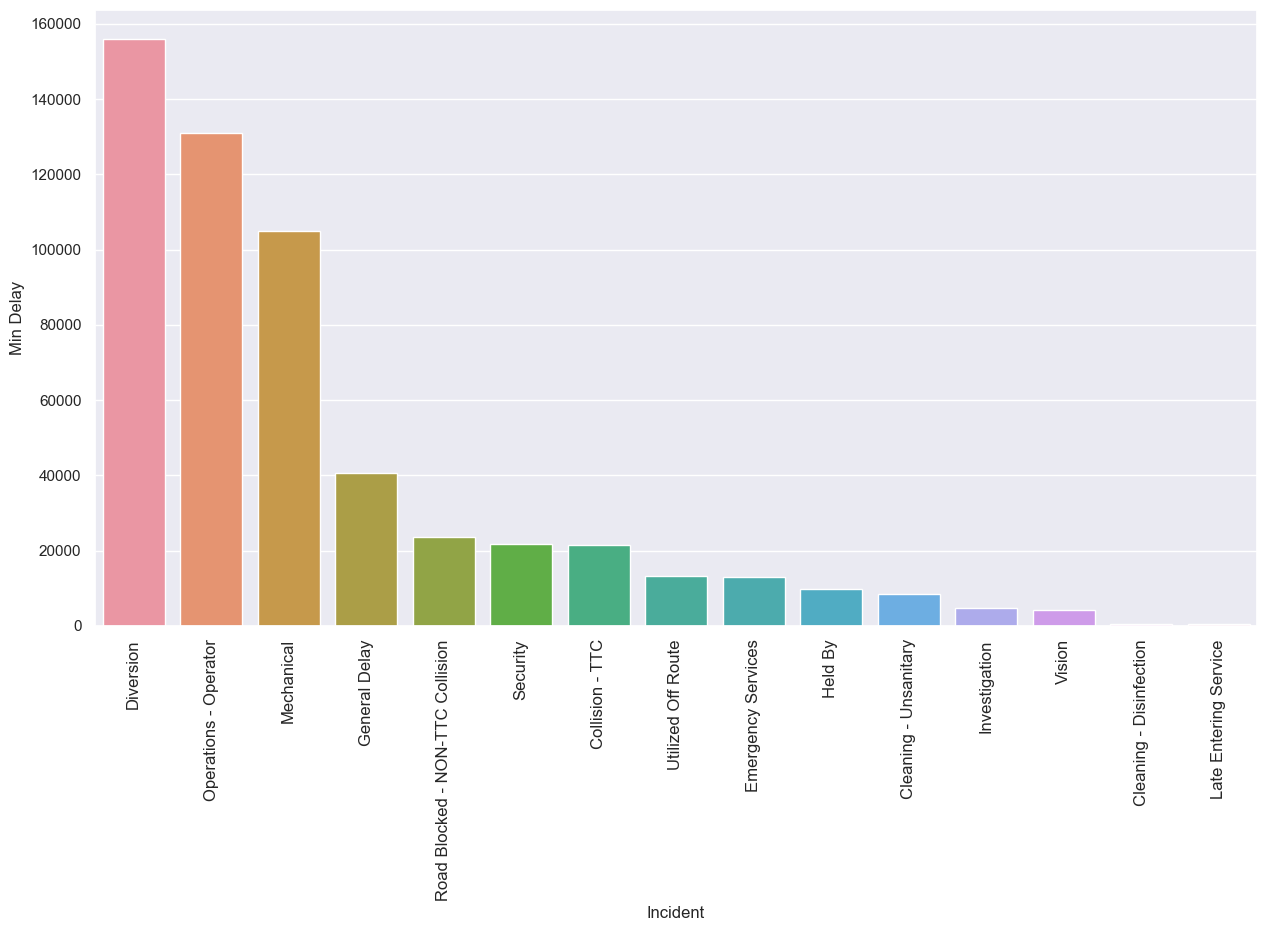

In [14]:
plt.figure(figsize=(15,8))
ttc_incident_delay = df.groupby('Incident')['Min Delay'].sum().reset_index().sort_values("Min Delay",ascending=False)
sns.barplot(x='Incident',y='Min Delay',data=ttc_incident_delay)
plt.xticks(rotation=90, size=12)
plt.savefig('incident vs Min delay.png')
plt.show()

It seems "Divesion" caused the most delays throughout the data and "Operations - Operators" and "Mechanical" incidents are top 2nd and 3rd. "Gemeral Delay" is the 4th in causes of delay. Meanwhile, other incidents remain fairly low.

2.Which route consists most of the delays?

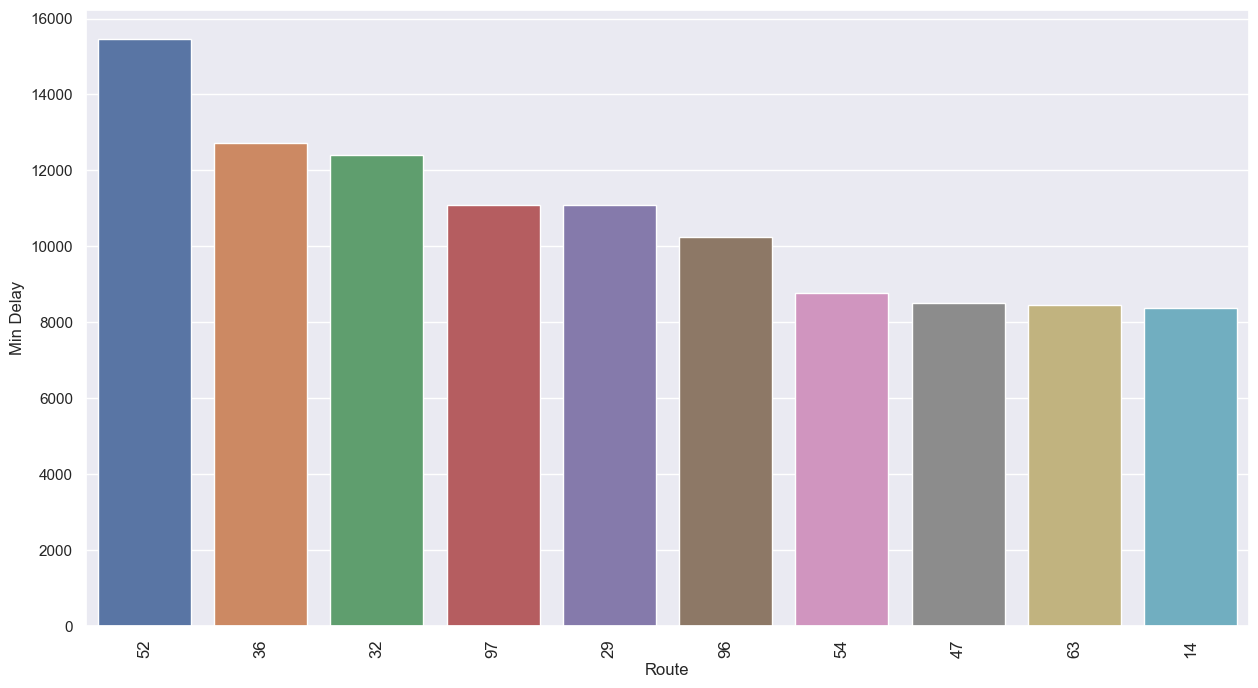

In [15]:
plt.figure(figsize=(15,8))
ttc_route_delay = df.groupby('Route')['Min Delay'].sum().reset_index().sort_values("Min Delay",ascending=False).head(10)
sns.barplot(x='Route',y='Min Delay',data=ttc_route_delay)
plt.xticks(rotation=90, size=12)
plt.savefig('Route_vs_Min_Delay.png')
plt.show()

It may seem that Route 52, 36, 32 consists of maximum amount of delay. hence the bus following to those routes will face some delays.

3.Which month has the most of the delays?

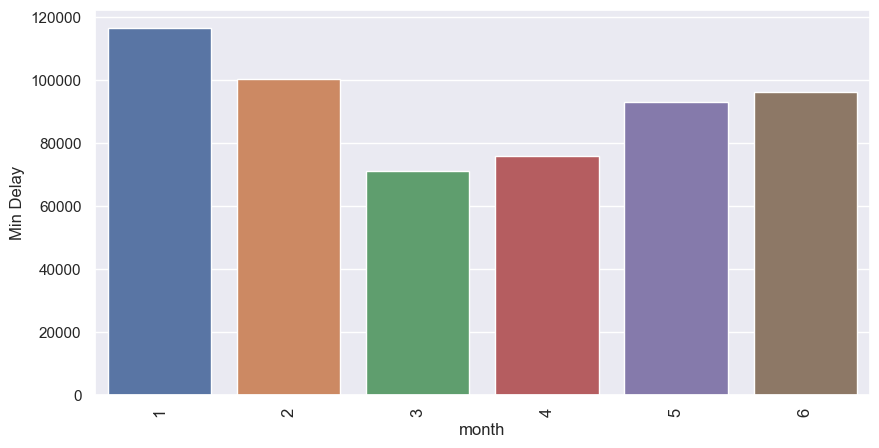

In [16]:
plt.figure(figsize=(10,5))
ttc_month_delay = df.groupby('month')['Min Delay'].sum().reset_index().sort_values("Min Delay")
sns.barplot(x='month',y='Min Delay', data=ttc_month_delay)
plt.xticks(rotation=90, size=12)
plt.savefig('Month vs Min Delay.jpg')
plt.show()

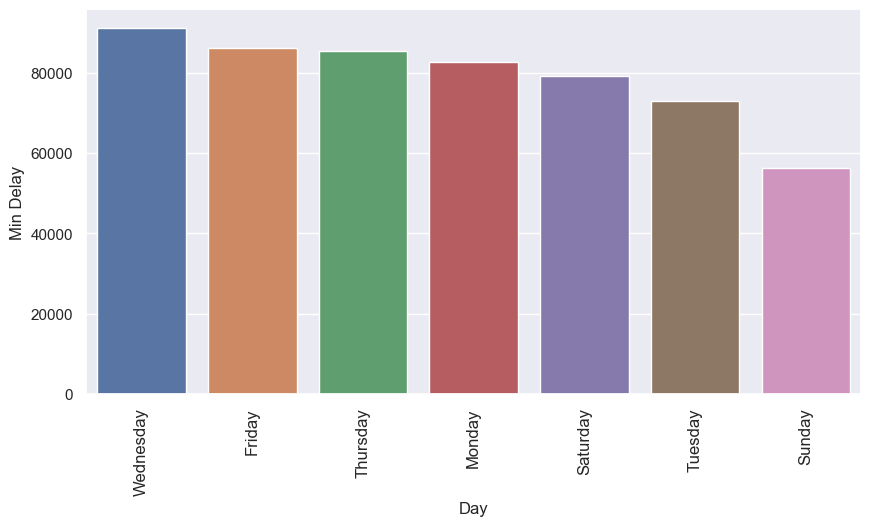

In [17]:
plt.figure(figsize=(10,5))
ttc_month_delay = df.groupby('Day')['Min Delay'].sum().reset_index().sort_values("Min Delay",ascending=False)
sns.barplot(x='Day',y='Min Delay',data=ttc_month_delay)
plt.xticks(rotation=90, size=12)
plt.savefig('Day vs Min Delay.jpg')
plt.show()

We can clearly see that in the winter, January and february the delays are at the peak. afterwards, with seasonal change delays drops down. Furthermore, weekdays such as Wednesday, friday and thursday had most of the delays.

Now lets check on which session the delays were more.

In [32]:
df['Session'] = pd.to_datetime(df['Time'], errors='coerce')
df.Session

0       2023-01-18 02:00:00
1       2023-01-18 02:00:00
2       2023-01-18 02:00:00
3       2023-01-18 02:07:00
4       2023-01-18 02:13:00
                ...        
27346   2023-01-18 00:45:00
27347   2023-01-18 01:08:00
27348   2023-01-18 01:15:00
27349   2023-01-18 01:33:00
27350   2023-01-18 01:55:00
Name: Session, Length: 27187, dtype: datetime64[ns]

<AxesSubplot:>

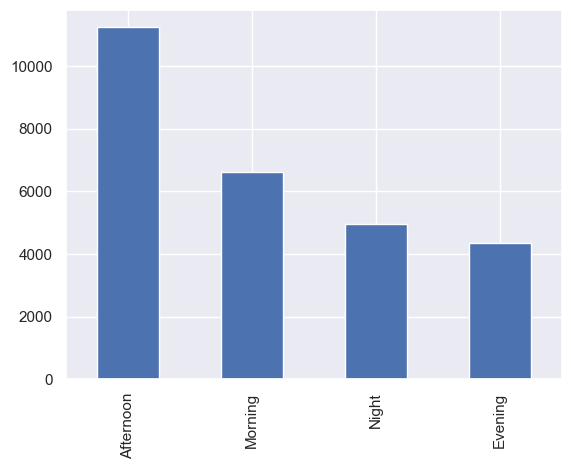

In [40]:
session=pd.cut(df.Session.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)


session.value_counts().plot.bar()

In [44]:
df.Session = session
df.Session

0        Night
1        Night
2        Night
3        Night
4        Night
         ...  
27346    Night
27347    Night
27348    Night
27349    Night
27350    Night
Name: Session, Length: 27187, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

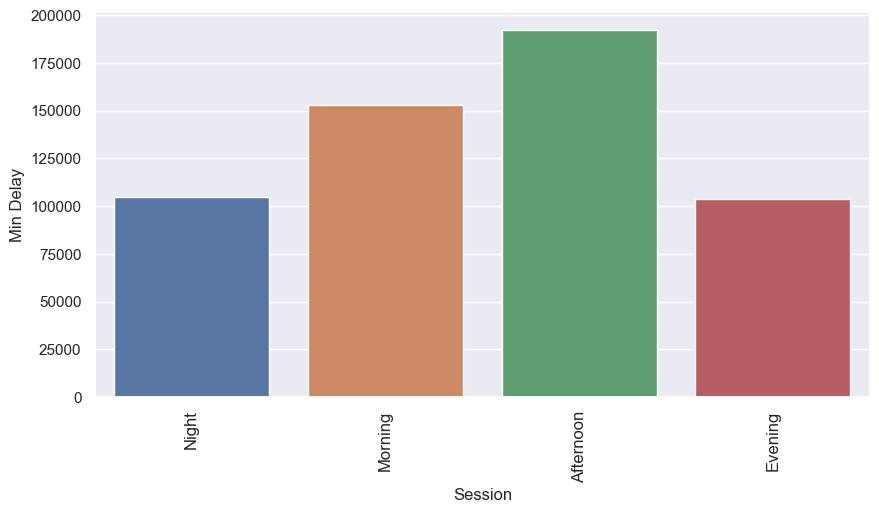

In [46]:
plt.figure(figsize=(10,5))
ttc_month_delay = df.groupby('Session')['Min Delay'].sum().reset_index().sort_values("Min Delay",ascending=False)
sns.barplot(x='Session',y='Min Delay',data=ttc_month_delay)
plt.xticks(rotation=90, size=12)
plt.savefig('Session vs Min Delay.jpg')
plt.show()

It seems that throught the data ttc bus had maximum delays on afternoon and morning while evening and night delays remaine equal.